# Case Study 4:- Credit Card Case study

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
spend = pd.read_csv(r'/Users/khushboochheda/Desktop/DataScience/Python/Case_Study/case_study4/spend.csv',usecols=["Customer","Month","Type","Amount"])
repayment = pd.read_csv(r'/Users/khushboochheda/Desktop/DataScience/Python/Case_Study/case_study4/Repayment.csv',usecols = ["Customer","Month","Amount"])
cust_acq = pd.read_csv(r'/Users/khushboochheda/Desktop/DataScience/Python/Case_Study/case_study4/Customer Acqusition.csv',usecols=["Customer","Age","City","Product","Limit","Company","Segment"])

In [151]:
spend.head(5)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [152]:
repayment.head(5)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [153]:
cust_acq.head(5)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [154]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [155]:
repayment.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [156]:
cust_acq.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [157]:
print(spend.shape)
print(repayment.shape)
print(cust_acq.shape)

(1500, 4)
(1523, 3)
(100, 7)


In [158]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [159]:
repayment.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [160]:
cust_acq.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [161]:
repayment.dropna(inplace=True)

In [162]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

Question 1. In the above dataset

a. In case age is less than 18, replace it with mean of age values.

In [163]:
age_mean = cust_acq['Age'].mean()

In [164]:
age_mean

46.49

In [165]:
cust_acq.loc[cust_acq['Age']<18,'Age'] = cust_acq['Age'].mean()

In [166]:
age_new_mean = cust_acq['Age'].mean()

In [167]:
age_new_mean

48.399399999999986

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [168]:
cust_acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [169]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [170]:
cust_spend = pd.merge(left=cust_acq , right=spend , on= 'Customer' , how= 'inner')

In [171]:
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13


In [172]:
cust_spend[cust_spend['Amount']> cust_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [173]:
cust_spend.loc[cust_spend['Amount']> cust_spend['Limit'],'Amount']= (50*cust_spend['Limit']).div(100)

In [174]:
cust_spend[cust_spend['Amount']> cust_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [175]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [176]:
cust_acq.head(3)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [177]:
cust_repay = pd.merge(left=repayment, right= cust_acq, on= 'Customer', how= 'inner')

In [178]:
cust_repay

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...
1495,A7,22-Nov-05,55108.71,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [179]:
cust_repay[cust_repay['Amount']>cust_repay['Limit']]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
18,A8,5-Feb-04,156913.59,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,A8,12-Jan-04,350999.98,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,A8,31-Mar-06,155642.95,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,A8,9-May-05,145457.38,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,A8,8-May-06,361184.89,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...
1494,A7,6-May-06,400375.97,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [180]:
cust_repay.loc[cust_repay['Amount']>cust_repay['Limit'],'Amount'] = cust_repay['Limit']

In [181]:
cust_repay[cust_repay['Amount']>cust_repay['Limit']]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [182]:
unique_cust = cust_acq['Customer'].value_counts().sum()

In [183]:
unique_cust

100

b. How many distinct categories exist?

In [184]:
cust_acq['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

c. What is the average monthly spend by customers?

In [185]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [186]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [187]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [188]:
spend.dtypes

Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [189]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x, format= '%B'))
spend['Yearly']= spend['Month'].apply(lambda x:pd.Timestamp.strftime(x, format= '%Y'))

In [190]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [191]:
avg_spend = round(spend.groupby(['Yearly','Monthly']).mean(),2)

In [192]:
avg_spend

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

d. What is the average monthly repayment by customers?

In [193]:
repayment.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [194]:
repayment['Month'] = pd.to_datetime(repayment['Month'])

In [195]:
repayment.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [196]:
repayment.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [197]:
repayment['Monthly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x, format= '%B'))
repayment['Yearly']= repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x, format= '%Y'))

In [198]:
avg_repay = round(spend.groupby(['Yearly','Monthly']).mean(),2)

In [199]:
avg_repay

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [200]:
cust360 = pd.merge(left = cust_spend, right= repayment, on= 'Customer', how = 'inner')

In [201]:
cust360.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [202]:
cust360.rename(columns={'Amount_x':'Amt_spent', 'Amount_y':'Amt_repaid'},inplace= True)

In [203]:
cust360.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amt_spent,Month_y,Amt_repaid,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004


In [204]:
interest_amt = cust360.groupby(['Yearly','Monthly'])['Amt_spent','Amt_repaid'].sum()

/var/folders/k3/fjnr394n4pd95j1d6xr2f4cw0000gn/T/ipykernel_19392/3937283763.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_amt = cust360.groupby(['Yearly','Monthly'])['Amt_spent','Amt_repaid'].sum()


In [205]:
interest_amt

Amt_spent    Amt_repaid
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [206]:
interest_amt['profit'] = interest_amt['Amt_repaid'] - interest_amt['Amt_spent']

In [207]:
interest_amt

Amt_spent    Amt_repaid        profit
Yearly Monthly                                            
2004   April      1.194516e+08  2.285403e+08  1.090887e+08
       February   7.613922e+07  1.602419e+08  8.410268e+07
       January    1.088357e+09  1.699210e+09  6.108525e+08
       March      5.594171e+07  8.974470e+07  3.380298e+07
       May        8.800456e+07  1.411594e+08  5.315485e+07
       November   5.504612e+07  7.860290e+07  2.355678e+07
       September  5.144278e+07  8.016122e+07  2.871844e+07
2005   April      9.366405e+07  1.747894e+08  8.112539e+07
       August     1.361400e+08  2.477449e+08  1.116049e+08
       December   4.348638e+07  9.944533e+07  5.595895e+07
       February   5.890557e+08  9.416163e+08  3.525606e+08
       January    1.324129e+08  1.810333e+08  4.862042e+07
       July       3.995653e+07  7.997268e+07  4.001615e+07
       June       1.174019e+08  2.213774e+08  1.039755e+08
       May        7.149030e+08  1.099197e+09  3.842944e+08
       November   1.532278e+08  2.763119e+08  1.230841e+08
       October    3.140993e+07  6.027830e+07  2.886837e+07
       September  3.195551e+07  7.530449e+07  4.334898e+07
2006   April      3.229722e+08  6.093666e+08  2.863944e+08
       August     5.849630e+07  7.167032e+07  1.317402e+07
       December   4.585222e+07  7.087702e+07  2.502480e+07
       February   1.654843e+08  2.903280e+08  1.248436e+08
       January    5.127574e+07  8.974491e+07  3.846917e+07
       July       1.444093e+08  2.245720e+08  8.016271e+07
       June       5.302118e+07  6.914431e+07  1.612313e+07
       March      7.393854e+08  1.115725e+09  3.763400e+08
       May        3.297954e+08  5.434823e+08  2.136869e+08
       November   1.124836e+08  1.355832e+08  2.309955e+07
       October    5.285823e+07  7.890924e+07  2.605102e+07
       September  5.395681e+07  8.083199e+07  2.687518e+07

In [208]:
interest_amt['Interest_earned'] = (2.9 * interest_amt['profit'])/100

In [209]:
interest_amt

Amt_spent    Amt_repaid        profit  Interest_earned
Yearly Monthly                                                             
2004   April      1.194516e+08  2.285403e+08  1.090887e+08     3.163572e+06
       February   7.613922e+07  1.602419e+08  8.410268e+07     2.438978e+06
       January    1.088357e+09  1.699210e+09  6.108525e+08     1.771472e+07
       March      5.594171e+07  8.974470e+07  3.380298e+07     9.802865e+05
       May        8.800456e+07  1.411594e+08  5.315485e+07     1.541491e+06
       November   5.504612e+07  7.860290e+07  2.355678e+07     6.831466e+05
       September  5.144278e+07  8.016122e+07  2.871844e+07     8.328349e+05
2005   April      9.366405e+07  1.747894e+08  8.112539e+07     2.352636e+06
       August     1.361400e+08  2.477449e+08  1.116049e+08     3.236542e+06
       December   4.348638e+07  9.944533e+07  5.595895e+07     1.622810e+06
       February   5.890557e+08  9.416163e+08  3.525606e+08     1.022426e+07
       January    1.324129e+08  1.810333e+08  4.862042e+07     1.409992e+06
       July       3.995653e+07  7.997268e+07  4.001615e+07     1.160468e+06
       June       1.174019e+08  2.213774e+08  1.039755e+08     3.015290e+06
       May        7.149030e+08  1.099197e+09  3.842944e+08     1.114454e+07
       November   1.532278e+08  2.763119e+08  1.230841e+08     3.569438e+06
       October    3.140993e+07  6.027830e+07  2.886837e+07     8.371827e+05
       September  3.195551e+07  7.530449e+07  4.334898e+07     1.257121e+06
2006   April      3.229722e+08  6.093666e+08  2.863944e+08     8.305437e+06
       August     5.849630e+07  7.167032e+07  1.317402e+07     3.820465e+05
       December   4.585222e+07  7.087702e+07  2.502480e+07     7.257193e+05
       February   1.654843e+08  2.903280e+08  1.248436e+08     3.620465e+06
       January    5.127574e+07  8.974491e+07  3.846917e+07     1.115606e+06
       July       1.444093e+08  2.245720e+08  8.016271e+07     2.324719e+06
       June       5.302118e+07  6.914431e+07  1.612313e+07     4.675707e+05
       March      7.393854e+08  1.115725e+09  3.763400e+08     1.091386e+07
       May        3.297954e+08  5.434823e+08  2.136869e+08     6.196920e+06
       November   1.124836e+08  1.355832e+08  2.309955e+07     6.698869e+05
       October    5.285823e+07  7.890924e+07  2.605102e+07     7.554795e+05
       September  5.395681e+07  8.083199e+07  2.687518e+07     7.793803e+05

f. What are the top 5 product types?

In [210]:
spend.head(3)

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004


In [211]:
spend['Type'].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

g. Which city is having maximum spend?

In [212]:
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13


In [213]:
city_spend = cust_spend.groupby('City')['Amount'].sum().sort_values(ascending = False)

In [214]:
city_spend.head(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

h. Which age group is spending more money?

In [215]:
cust_spend['Age_group'] = pd.cut(cust_spend['Age'], bins = np.arange(18,90,8), labels = ["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"], include_lowest= True)

In [216]:
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82


In [217]:
cust_spend.groupby('Age_group')['Amount'].sum().sort_values(ascending = False)

Age_group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

i. Who are the top 10 customers in terms of repayment?

In [218]:
cust_repay.head(3)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [219]:
cust_repay.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [220]:
cust_spend.dtypes

Customer       object
Age           float64
City           object
Product        object
Limit         float64
Company        object
Segment        object
Month          object
Type           object
Amount        float64
Age_group    category
dtype: object

In [221]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'])

In [222]:
cust_spend['Year'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x, format= '%Y'))

In [223]:
cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,50-58,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42,2004


In [224]:
city_spend = cust_spend.pivot_table(index= ['City','Year'], columns='Product' , aggfunc= 'sum' , values='Amount')

In [225]:
city_spend

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

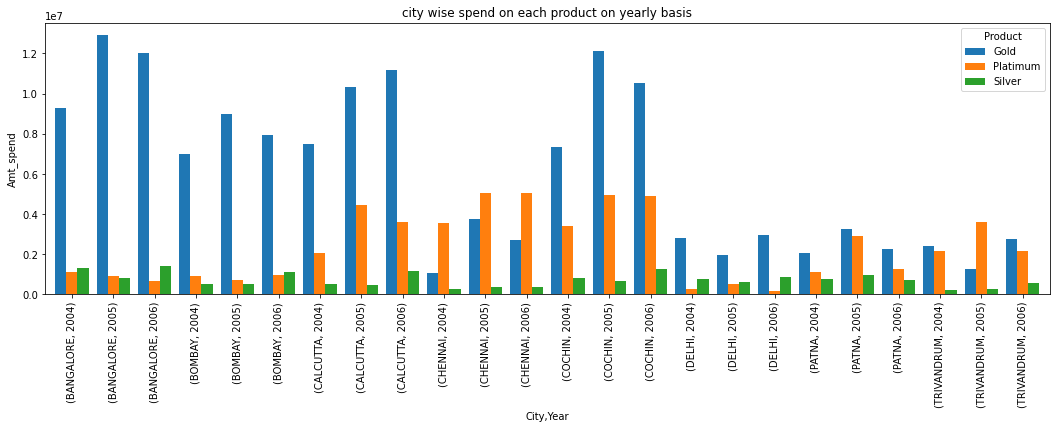

In [226]:
city_spend.plot(kind = 'bar' , figsize=(18,5),width=0.8)
plt.ylabel('Amt_spend')
plt.title('city wise spend on each product on yearly basis')
plt.show()

4. Create graphs for

a. Monthly comparison of total spends, city wise

In [228]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x, format= '%B'))

In [229]:
cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58,2004,January
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,50-58,2004,January
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58,2004,January
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42,2004,January


In [230]:
month_city = cust_spend.groupby(['Monthly','City'])['Amount'].sum().sort_index().reset_index()

In [231]:
month_city

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [232]:
month_city = pd.pivot_table(data = cust_spend, index= ['City'], columns='Monthly' , aggfunc= 'sum' , values='Amount')

In [233]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


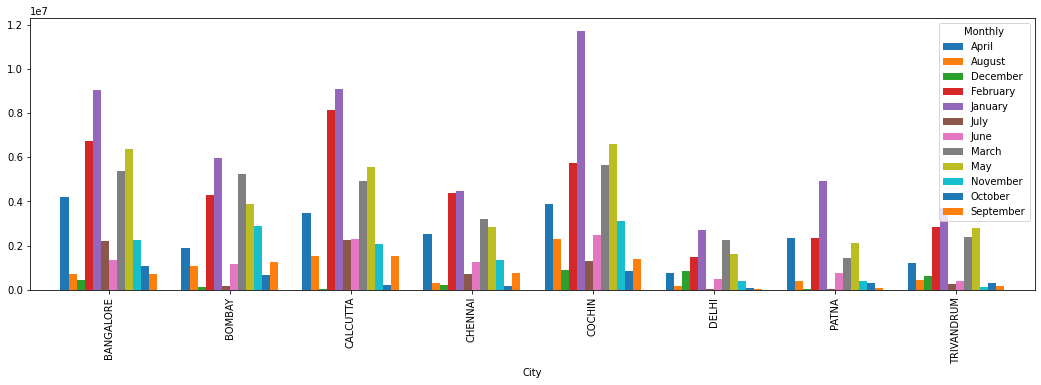

In [234]:
month_city.plot(kind = 'bar',figsize=(18,5),width=0.8)
plt.show()

b. Comparison of yearly spend on air tickets

In [248]:
air_tickets = cust_spend.groupby(['Year','Type'])[['Amount']].sum().reset_index()

In [249]:
air_tickets

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [250]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

In [251]:
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


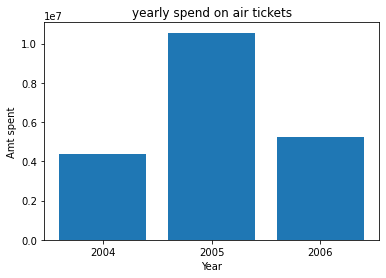

In [259]:
plt.bar(filtered['Year'], height=filtered['Amount'])
plt.ylabel('Amt spent')
plt.xlabel('Year')
plt.title('yearly spend on air tickets')
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)

In [260]:
monthly_product = cust_spend.pivot_table(index= 'Product',columns='Monthly',aggfunc='sum', values= 'Amount')

In [261]:
monthly_product

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


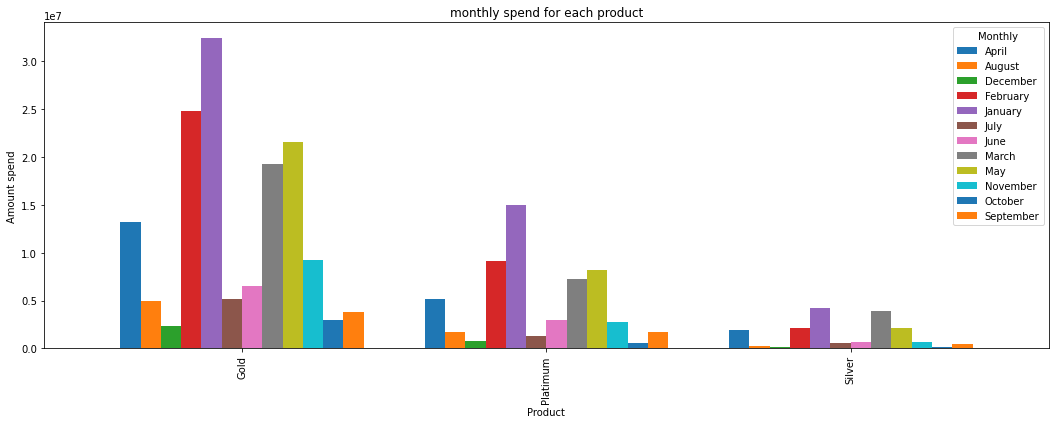

In [264]:
monthly_product.plot(kind = 'bar',figsize=(18,6),width=0.8)
plt.ylabel('Amount spend')
plt.title('monthly spend for each product')
plt.show()

From above we can see that sales for all products are high for following months
1. January (being highest)
2. February
3. March
4. April
5. May

5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [276]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])

In [277]:
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [278]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [280]:
summary_report('gold','monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na